In [1]:

from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

emotions = {
    '0':'anger', 
    '1':'disgust',
    '2':'fear', 
    '3':'happy', 
    '4':'sad', 
    '5':'surprised', 
    '6':'normal', 
}


Using TensorFlow backend.


In [2]:
df=pd.read_csv('fer2013.csv')

In [3]:
df.head(3)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training


In [4]:
df.shape[0]

35887

In [5]:
## reshape pixels into readable form
x = list(df["pixels"])
X = []
for i in range(len(x)):
    each_pixel = [int(num) for num in x[i].split()]
    X.append(each_pixel)

X = np.array(X)
X = X.reshape(X.shape[0], 48, 48,1)
X = X.astype("float32")
X /= 255


In [6]:
train_index=np.where(df.Usage=='Training')[0]
valid_index=np.where(df.Usage=='PublicTest')[0]
test_index=np.where(df.Usage=='PrivateTest')[0]
train_x=X[train_index]
train_y=df.emotion[train_index]
valid_x=X[valid_index]
valid_y=df.emotion[valid_index]
test_x=X[test_index]
test_y=df.emotion[test_index]

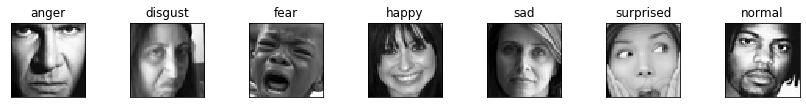

In [94]:
#preview each class
np.random.seed(2020)
fig = plt.figure(figsize=(20,20))

for i in range(len(emotions)):
    temp=np.where(train_y==i)[0]
    input_img = train_x[temp[np.random.choice(len(temp),1)],:,:,:]
    ax = fig.add_subplot(16,12,i+1)
    ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
    plt.title(emotions[str(i)])
    

plt.show()

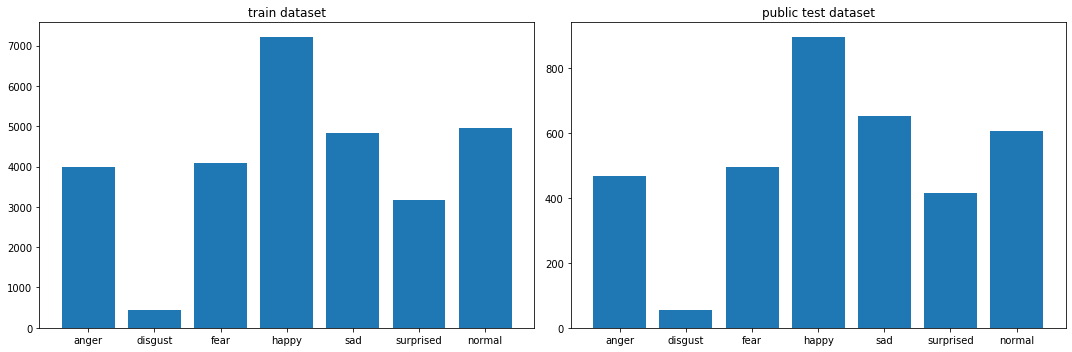

In [114]:
#plot distribution
 
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(np.arange(1,len(emotions)+1), np.bincount(train_y))
ax1.set_xticks(np.arange(1,len(emotions)+1,1))
ax1.set_xticklabels(emotions.values(), fontsize=10)
ax1.set_title('train dataset')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(np.arange(1,len(emotions)+1), np.bincount(valid_y))
ax2.set_xticks(np.arange(1,len(emotions)+1,1))
ax2.set_xticklabels(emotions.values(), fontsize=10)
ax2.set_title('public test dataset')
plt.tight_layout()
plt.show()


In [7]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D

#build model
modelN = Sequential()
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))

modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))

modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))

modelN.add(Flatten()) 
modelN.add(Dense(64, activation='relu'))
modelN.add(Dropout(0.5))
modelN.add(Dense(7, activation='softmax'))


modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 32
batch_size = 128

modelF = modelN.fit(train_x, to_categorical(train_y), nb_epoch=nb_epoch, batch_size=batch_size,
          validation_data=(valid_x, to_categorical(valid_y)), shuffle=False, verbose=1)

Training....
Train on 28709 samples, validate on 3589 samples
Epoch 1/32
28709/28709 [==============================] - 183s 6ms/step - loss: 1.8410 - accuracy: 0.2349 - val_loss: 1.7909 - val_accuracy: 0.2516
Epoch 2/32
28709/28709 [==============================] - 189s 7ms/step - loss: 1.7889 - accuracy: 0.2601 - val_loss: 1.6964 - val_accuracy: 0.3129
Epoch 3/32
28709/28709 [==============================] - 198s 7ms/step - loss: 1.6474 - accuracy: 0.3407 - val_loss: 1.5521 - val_accuracy: 0.4054
Epoch 4/32
28709/28709 [==============================] - 200s 7ms/step - loss: 1.5480 - accuracy: 0.3889 - val_loss: 1.4563 - val_accuracy: 0.4397
Epoch 5/32
28709/28709 [==============================] - 209s 7ms/step - loss: 1.4736 - accuracy: 0.4159 - val_loss: 1.4001 - val_accuracy: 0.4500
Epoch 6/32
28709/28709 [==============================] - 207s 7ms/step - loss: 1.4061 - accuracy: 0.4494 - val_loss: 1.3173 - val_accuracy: 0.4868
Epoch 7/32
28709/28709 [==========================

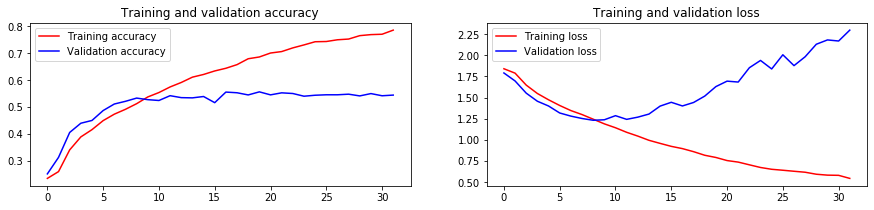

In [8]:
#plot accuracy and loss
modelN.save('facial_1')
acc = modelF.history['accuracy']
val_acc = modelF.history['val_accuracy']
loss = modelF.history['loss']
val_loss = modelF.history['val_loss']
epochs = range(len(acc))


fig=plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper left')

plt.show()

The model actually starts to overfit around 9 epoches, at which validation accuracy reaches its plateau while validation loss started to increase. 

In [9]:
train_accuracy=max(acc)
valid_accuracy=max(val_acc)

In [10]:
#predict on test set
y_prob = modelN.predict(test_x, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]

In [11]:
from sklearn.metrics import accuracy_score  
pred_accuracy=accuracy_score(test_y,y_pred)
print("Train Accuracy:",train_accuracy)
print("Validation Accuracy:",valid_accuracy)
print("Test Accuracy:",pred_accuracy)

Train Accuracy: 0.7853286
Validation Accuracy: 0.5561437606811523
Test Accuracy: 0.5603232098077459


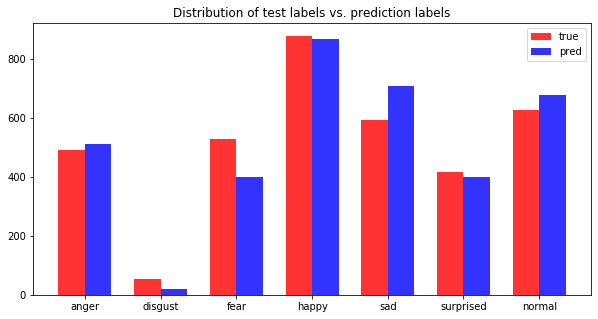

In [12]:
#plot distribution of test set
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

ind = np.arange(0,len(emotions),1)  
width = 0.35   
ax.bar(ind, np.bincount(test_y), width, color='r',alpha=0.8,label='true')
ax.bar(ind + width, np.bincount(y_pred), width, color='b',alpha=0.8,label='pred')
ax.set_xticks(np.arange(width/2,len(emotions)+width/2,1))
ax.set_xticklabels(emotions.values(),fontsize=10)
plt.title("Distribution of test labels vs. prediction labels")
plt.legend()
plt.show()

Overall, the distribution is similar.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report=classification_report(test_y,y_pred)
cm=confusion_matrix(test_y,y_pred)

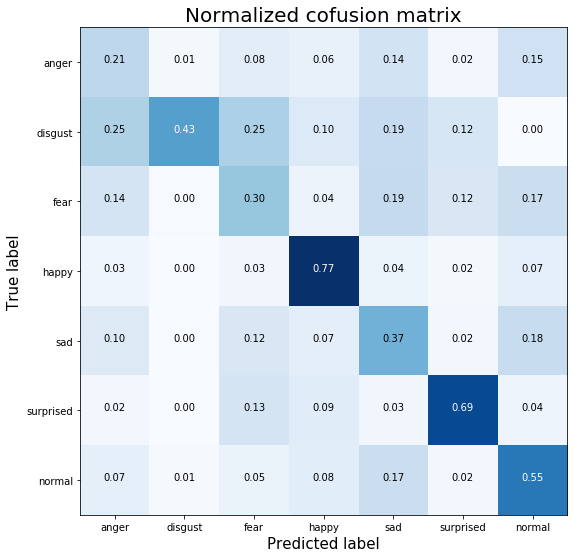

In [24]:
#plot normalized cofusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[0]):
        cm[i,j]=cm[i,j]/np.sum(cm[i,:])
#cm = cm.astype('float').apply(lambda x: x/np.sum(axis=0)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized cofusion matrix", fontsize=20)
#plt.colorbar()
tick_marks = np.arange(len(emotions))
plt.xticks(tick_marks, emotions.values())
plt.yticks(tick_marks, emotions.values())

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.tight_layout()

From the confusion matrix, other than diagnonal terms, only disgust is misclassified to anger/fear with probability more than 0.2. This is probably because of ambiguous boundary between disgust and anger/fear & unbalanced samples in dataset.

In [25]:
print(report)

              precision    recall  f1-score   support

           0       0.47      0.49      0.48       491
           1       0.45      0.16      0.24        55
           2       0.41      0.31      0.35       528
           3       0.79      0.78      0.79       879
           4       0.40      0.48      0.43       594
           5       0.72      0.69      0.71       416
           6       0.50      0.54      0.52       626

    accuracy                           0.56      3589
   macro avg       0.53      0.49      0.50      3589
weighted avg       0.56      0.56      0.56      3589



In [16]:
result=pd.DataFrame(y_pred)
result.to_csv('pred.csv')

Examples corresponding to comfusion matrix:


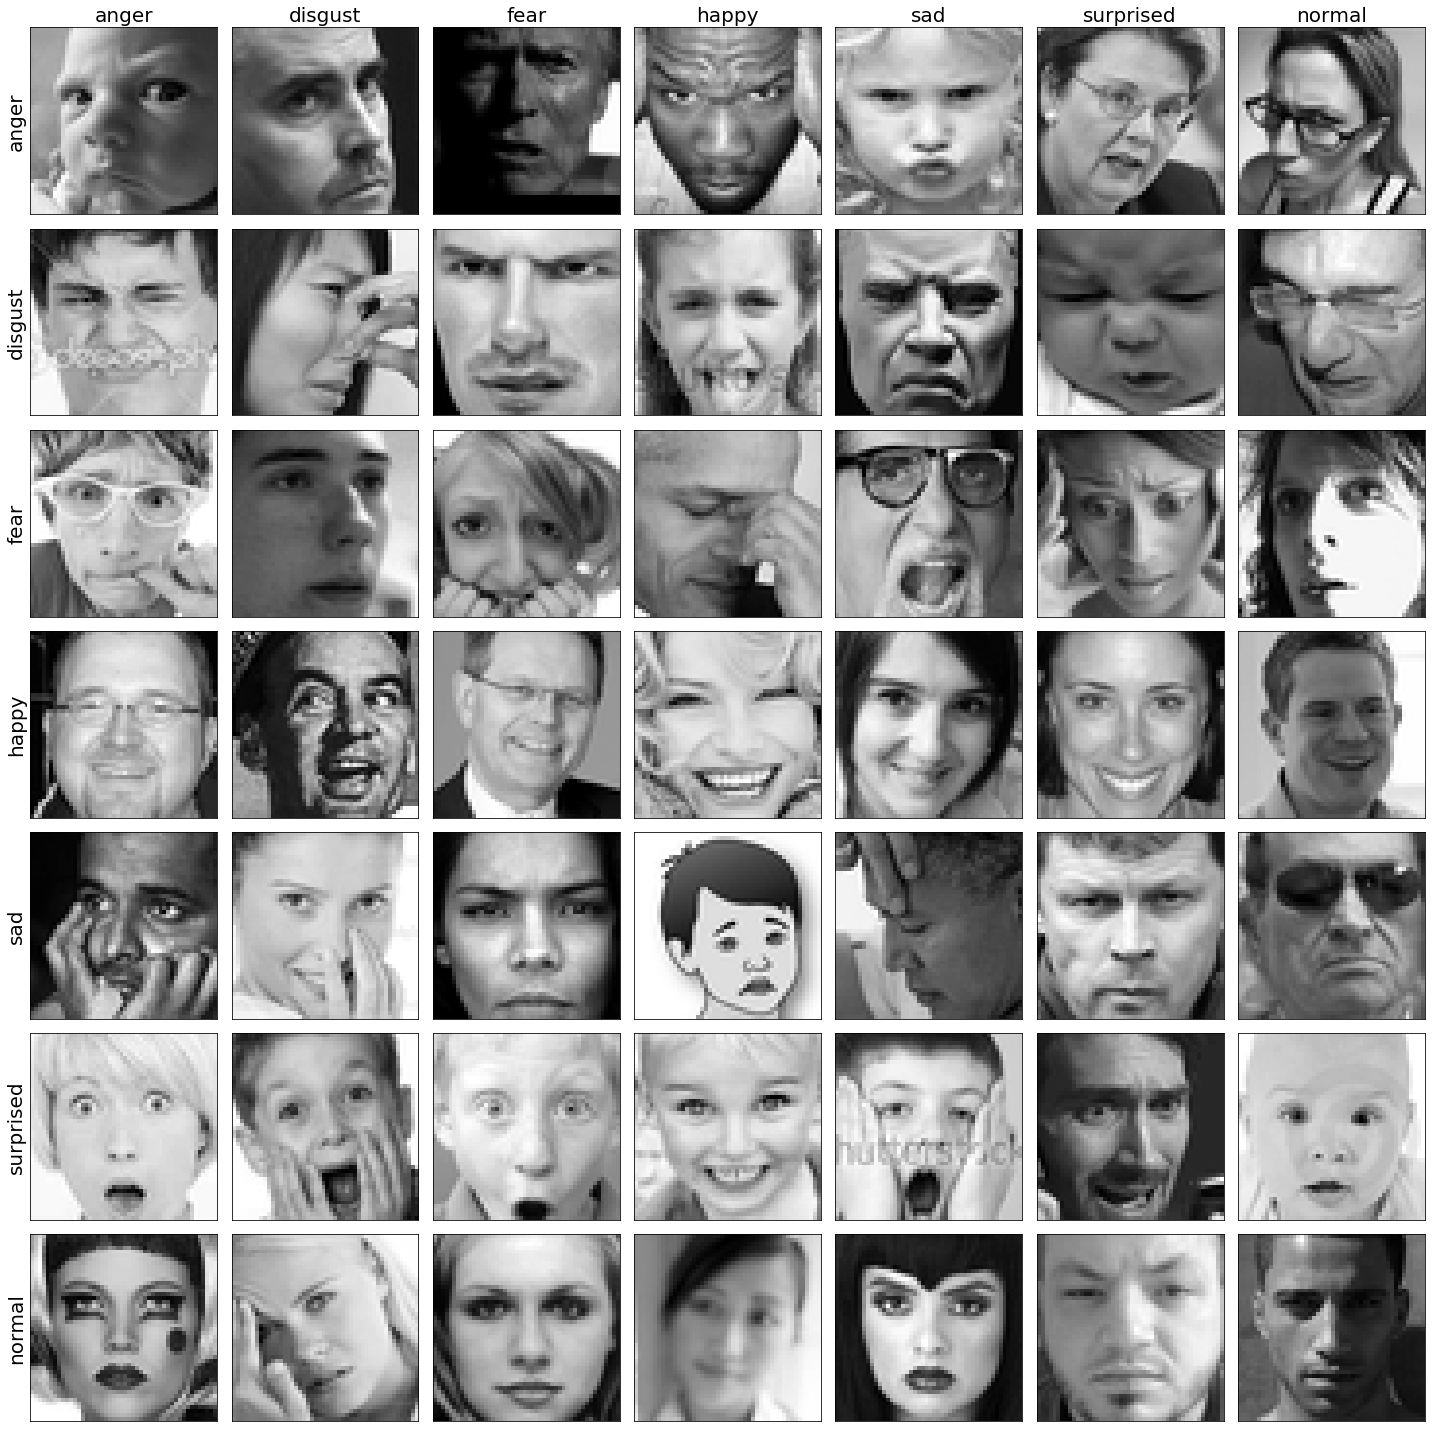

In [17]:
#see classified and misclassified picture
print('Examples corresponding to comfusion matrix:')
np.random.seed(2020)
n=cm.shape[0]
fig = plt.figure(figsize=(20,20))
for i in range(n*n):
    true=int(i/n)
    pred=i%n
    ind1=np.where(test_y==true)
    ind2=np.where(y_pred==pred)
    ind=ind1[ind1==ind2]
    input_img = test_x[np.random.choice(ind,1),:,:,:]
    ax = fig.add_subplot(n,n,i+1)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
    if(true==0):
        ax.set_title(emotions[str(pred)],fontsize=20)
    if(pred==0):
        ax.set_ylabel(emotions[str(true)],fontsize=20)
    plt.tight_layout()
plt.savefig('cm.png')
plt.show()

Facial expressions are indeed very difficult to classify due to complicated muscle movements. The model works well in predicting happy faces, probably because of it's domaince in number of samples. Also, it's hard to distinguish disgust and angry. There exists some originally misclassified examples, a new corrected dataset is released by Microsoft.